In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [35]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [36]:
pd.set_option("display.max_columns", None)

# Data Loading

In [37]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/third_scenario.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [38]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [39]:
data_initial.head()

,store_id,state_id,Total_sales,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,CA_1,CA,818,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CA_2,CA,1215,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CA_3,CA,1069,3,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.97,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,CA_4,CA,513,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.97,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TX_1,TX,876,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.47,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Conversion

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
hot_encoder=OneHotEncoder()

## Event

In [42]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [43]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [45]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [46]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

## Store Id

In [47]:
encoded_store=hot_encoder.fit_transform(data_initial[["store_id"]])
array_store=encoded_store.toarray()

In [48]:
hot_encoder.categories_

[array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
        'WI_2', 'WI_3'], dtype=object)]

In [49]:
store_df=pd.DataFrame(array_store, columns=['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
        'WI_2', 'WI_3'])

## State

In [50]:
encoded_state=hot_encoder.fit_transform(data_initial[["state_id"]])
array_state=encoded_state.toarray()

In [51]:
hot_encoder.categories_

[array(['CA', 'TX', 'WI'], dtype=object)]

In [52]:
state_df=pd.DataFrame(array_state, columns=['CA', 'TX', 'WI'])

In [53]:
frames=[data_initial, event_df, store_df, state_df]
data=pd.concat(frames, axis=1)

In [54]:
data.drop(["event_type_1", "nan", "Total_sales", "store_id", "state_id"], axis=1, inplace=True)

In [73]:
data.dropna(inplace=True)

In [74]:
data.head()

,Sales,date,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI
2,3,2011-01-29,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,2011-01-29,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2011-01-29,0,0,0,2.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,2011-01-29,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,2011-01-29,0,0,0,3.17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI
count,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000,19109.000000
mean,0.481763,0.329060,0.329374,0.329374,2.496335,0.142708,0.142708,0.143231,0.143231,0.142708,0.142708,0.142708,0.082213,0.088335,0.097336,0.091057,0.081114,0.078497,0.081114,0.081114,0.078497,0.081114,0.078497,0.081114,0.175258,0.191533,0.191009,0.191009,0.191009,0.060181,0.018316,0.026689,0.027212,0.008373,0.099744,0.099744,0.100110,0.100110,0.100110,0.100110,0.100110,0.100110,0.099744,0.100110,0.399707,0.300330,0.299963
std,0.962911,0.469884,0.469998,0.469998,0.137274,0.349784,0.349784,0.350317,0.350317,0.349784,0.349784,0.349784,0.274695,0.283789,0.296423,0.287697,0.273017,0.268959,0.273017,0.273017,0.268959,0.273017,0.268959,0.273017,0.380197,0.393518,0.393107,0.393107,0.393107,0.237828,0.134095,0.161177,0.162706,0.091123,0.299666,0.299666,0.300154,0.300154,0.300154,0.300154,0.300154,0.300154,0.299666,0.300154,0.489851,0.458413,0.458254
min,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,18.000000,1.000000,1.000000,1.000000,3.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Performance Function

In [77]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

### Train & Test

In [78]:
train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [79]:
test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [80]:
train=train.drop(["date"], axis=1)
test=test.drop(["date"], axis=1)

In [81]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
from sklearn.linear_model import ElasticNet

### Grid

In [84]:
elastic_net_model = ElasticNet()

In [85]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [86]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [87]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [88]:
elastic_predictions=elastic_net.predict(X_test)

In [89]:
performance_list("Control", elastic_net.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,15279,0.470581,0.023274,4.522545e-15,0.007593,1.410955,0.007783,0.665979,1.41523


In [90]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [91]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,3830,0.460961,0.01574,-0.141897,-0.141541,1.480444,0.01549,0.682853,1.481366


# Support Vector Machines

### Grid

In [92]:
elastic_net_model = ElasticNet()

In [93]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [94]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [95]:
from sklearn.svm import LinearSVR

In [96]:
sv_regressor=LinearSVR()

### Grid

In [97]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [98]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [99]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [100]:
from sklearn.svm import SVR

### Grid

In [101]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [102]:
sv_regressor_poly=SVR(kernel="poly")

In [103]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [104]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [105]:
sv_regressor_poly.best_estimator_

SVR(epsilon=0.2, kernel='poly')

### Predictions

In [106]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [107]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [108]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [109]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [110]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,15279,0.5,1.225423e-09,0.058839,0.058839,1.359709,0.007804,0.679855,1.359709


In [111]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,15279,0.222621,0.088787,-1.113815,-0.898852,2.317422,0.007865,0.535797,2.406764


### Results

In [112]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,3830,0.483865,0.024631,-0.087845,-0.088016,1.426919,0.015467,0.689537,1.42506


In [113]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,3830,0.286109,0.130947,-0.839759,-1.079472,2.418375,0.01602,0.61959,2.165578


# Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [115]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [116]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [117]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [118]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 300}

### Results

In [119]:
rf_predictions=grid_search.predict(X_test)

In [120]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [121]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,3830,0.531135,0.340925,0.008971,-0.538764,1.883611,0.016096,0.700987,1.31979


In [122]:
performance_list("Control", grid_search.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,15279,0.47427,0.632963,0.00778,NaN,NaN,0.004313,0.310579,0.654857


# Feature Extraction

In [123]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [124]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [125]:
on_leaf = estimator.apply(X_train)

In [126]:
X_train_ext=X_train[:]

In [127]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI,Node
2,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
3,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,0,0,0,2.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
5,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
6,0,0,0,3.17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,1,1,0,2.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
15296,1,1,0,2.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,41
15297,1,1,0,2.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5
15298,1,1,0,2.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5


### Test Node Selection

In [129]:
on_leaf_test = estimator.apply(X_test)

In [130]:
X_test_ext=X_test[:]

In [131]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
X_test_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI,Node
0,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
1,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20
2,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
3,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
3826,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34
3827,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5
3828,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [133]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [134]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [135]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [136]:
train_new=concated_df.iloc[:len(X_train)]

In [137]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [139]:
elastic_net_model_new = ElasticNet()

In [140]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [141]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [142]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [143]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [144]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [145]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,3830,0.466234,0.063914,-0.128984,-0.144004,1.482907,0.015521,0.684031,1.46714


### SVM

#### Linear

In [146]:
sv_regressor_new=LinearSVR()

### Grid

In [147]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [148]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [149]:
sv_regressor_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [150]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,3830,0.483865,0.024631,-0.087845,-0.088016,1.426919,0.015467,0.689537,1.42506


## Poly

### Grid

In [151]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [152]:
sv_regressor_poly_new=SVR(kernel="poly")

In [153]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [154]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [155]:
sv_regressor_poly_new.best_estimator_

SVR(epsilon=0.2, kernel='poly')

In [156]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,3830,0.265942,0.128194,-0.979268,-1.208456,2.602064,0.016019,0.6083,2.287338


### Random Forest

In [157]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [158]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 500}

In [159]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,3830,0.526157,0.316004,-0.000406,-0.495838,1.841104,0.015978,0.697829,1.326275


# General Result Table

In [160]:
pd.options.display.float_format = '{:,.8f}'.format

In [161]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [162]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,3830,0.46096149,0.01574005,-0.14189748,-0.14154103,1.48044442,0.01548953,0.68285255,1.48136574
1,Support Vector Regressor Linear Performance,3830,0.48386537,0.02463074,-0.08784548,-0.08801606,1.42691946,0.01546723,0.68953696,1.42505954
2,Support Vector Regressor Polynomial Performance,3830,0.28610851,0.13094715,-0.83975918,-1.07947161,2.41837501,0.01601973,0.61959028,2.16557795
3,Random Forest Performance,3830,0.53113540,0.34092468,0.00897068,-0.53876426,1.88361147,0.01609572,0.70098713,1.31978988
4,Elastic Net Performance with Feature Extraction,3830,0.46623393,0.06391430,-0.12898423,-0.14400388,1.48290727,0.01552060,0.68403063,1.46714039
5,SVR Linear Performance with Feature Extraction,3830,0.48386537,0.02463074,-0.08784547,-0.08801606,1.42691945,0.01546723,0.68953697,1.42505953
6,SVR Polynomail Performance with Feature Extrac...,3830,0.26594209,0.12819351,-0.97926831,-1.20845621,2.60206377,0.01601860,0.60829954,2.28733833
7,Random Forest Performance with Feature Extraction,3830,0.52615725,0.31600415,-0.00040578,-0.49583846,1.84110362,0.01597838,0.69782933,1.32627523


## RFOverfitting

In [163]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,15279,0.47427047,0.63296301,0.00778024,nan,nan,0.00431322,0.31057947,0.65485728


In [164]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,3830,0.53113540,0.34092468,0.00897068,-0.53876426,1.88361147,0.01609572,0.70098713,1.31978988


In [165]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,15250,0.47474368,0.64281202,0.00923241,nan,nan,0.00362163,0.27344034,0.57597469


In [166]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,3830,0.52615725,0.31600415,-0.00040578,-0.49583846,1.84110362,0.01597838,0.69782933,1.32627523


# Feature Control

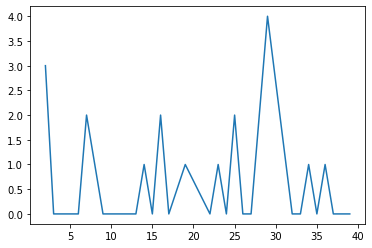

In [167]:
plt.plot(data.Sales[:28])

In [168]:
from statsmodels.graphics.tsaplots import plot_acf

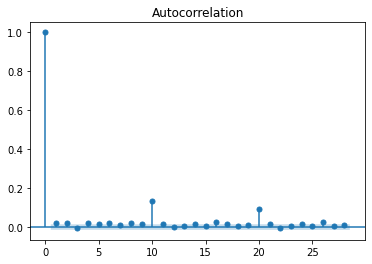

In [169]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [170]:
concated_df.Node.value_counts()

5     9954
8     2190
12    1406
20    1254
34     997
6      868
9      365
15     336
41     289
27     230
23     225
49     204
13     141
21     106
50     100
35      93
37      62
42      48
24      48
38      31
16      30
29      22
52      21
28      21
55      20
44      18
53      10
45      10
56      10
Name: Node, dtype: int64

In [171]:
concated_df[concated_df["Node"]==6].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI,Node,Sales,new_feature
2450,1,1,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,6,1,nan
2452,1,1,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,6,0,1.00000000
2453,1,1,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,6,1,0.00000000
2454,1,1,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,6,0,1.00000000
2457,1,1,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0,0.00000000


In [172]:
concated_df[concated_df["Node"]==9].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI,Node,Sales,new_feature
10684,1,1,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,9,0,nan
10694,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,9,1,0.00000000
10704,1,1,1,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,9,2,1.00000000
10714,1,0,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,9,0,2.00000000
10724,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,9,0,0.00000000


In [173]:
concated_df[concated_df["Node"]==42].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI,Node,Sales,new_feature
14366,1,0,0,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,0,nan
14436,0,1,1,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,6,0.00000000
14506,0,0,0,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,2,6.00000000
14576,0,0,0,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,2,2.00000000
14926,1,1,0,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,10,2.00000000


# General Function

In [174]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    
    train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    test.reset_index(drop=True, inplace=True)

    ### Date and Customer Drop

    train=train.drop(["date"], axis=1)
    test=test.drop(["date"], axis=1)

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), tes
    t["Sales"]
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[200,300,500], "max_features":[8,12,16],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [175]:
res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [176]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,3830,0.46108007,0.01631496,-0.14160379,-0.14126199,1.48016538,0.01548928,0.68283490,1.48094647
0,SVR Linear Performance Lag 1,3830,0.48386537,0.02463074,-0.08784547,-0.08801606,1.42691945,0.01546723,0.68953697,1.42505953
0,SVR Polynomial Performance Lag 1,3830,0.28037898,0.14682586,-0.87735454,-1.31416391,2.69682658,0.01608070,0.61847016,2.20583637
0,Random Forest Performance Lag 1,3830,0.53564344,0.35672538,0.01731129,-0.50961149,1.85492029,0.01627422,0.70649230,1.31896005


In [177]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,3830,0.46096149,0.01574005,-0.14189748,-0.14154103,1.48044442,0.01548953,0.68285255,1.48136574
1,Support Vector Regressor Linear Performance,3830,0.48386537,0.02463074,-0.08784548,-0.08801606,1.42691946,0.01546723,0.68953696,1.42505954
2,Support Vector Regressor Polynomial Performance,3830,0.28610851,0.13094715,-0.83975918,-1.07947161,2.41837501,0.01601973,0.61959028,2.16557795
3,Random Forest Performance,3830,0.53113540,0.34092468,0.00897068,-0.53876426,1.88361147,0.01609572,0.70098713,1.31978988
4,Elastic Net Performance with Feature Extraction,3830,0.46623393,0.06391430,-0.12898423,-0.14400388,1.48290727,0.01552060,0.68403063,1.46714039
5,SVR Linear Performance with Feature Extraction,3830,0.48386537,0.02463074,-0.08784547,-0.08801606,1.42691945,0.01546723,0.68953697,1.42505953
6,SVR Polynomail Performance with Feature Extrac...,3830,0.26594209,0.12819351,-0.97926831,-1.20845621,2.60206377,0.01601860,0.60829954,2.28733833
7,Random Forest Performance with Feature Extraction,3830,0.52615725,0.31600415,-0.00040578,-0.49583846,1.84110362,0.01597838,0.69782933,1.32627523
